In [1]:
%matplotlib inline

In [94]:
import matplotlib.pylab as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 10),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13,
         'axes.labelweight':'bold',
          'legend.fontsize': 13,
          'font.size':13,
         'figure.max_open_warning': 0}

plt.rcParams.update(params)
import matplotlib.colors as colors

In [95]:
import dask.array as da
from daskms import xds_from_table, xds_to_table
from dask.distributed import Client

import numpy as np

In [96]:
client = Client(n_workers=4, 
                threads_per_worker=4, 
                processes=True, 
                memory_limit='8GB'
                )
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 29.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42007,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 29.80 GiB
Comm: tcp://127.0.0.1:41861,Total threads: 4
Dashboard: http://127.0.0.1:38205/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:45193,


# Setting the data path

In [3]:
#data_path = '/media/nadeem/data1/nadeem/GitHub/MeerKAT/RFI/DARA2021/'
data_path = '/home/mpho/Documents/NASSP Honours 2024/OT2/Tutorial/'

# Create xarray datasets from Measurement Set 

In [4]:

#ds = xds_from_table(data_path+"DARA_RFI_2.ms")
ds = xds_from_table(data_path+"1548939342.ms")

In [5]:
print(ds)

[<xarray.Dataset> Size: 1GB
Dimensions:          (row: 31875, corr: 2, chan: 1024, flagcat: 1, uvw: 3)
Coordinates:
    ROWID            (row) int64 255kB dask.array<chunksize=(10000,), meta=np.ndarray>
Dimensions without coordinates: row, corr, chan, flagcat, uvw
Data variables: (12/24)
    SIGMA            (row, corr) float32 255kB dask.array<chunksize=(10000, 2), meta=np.ndarray>
    OBSERVATION_ID   (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    TIME             (row) float64 255kB dask.array<chunksize=(10000,), meta=np.ndarray>
    FEED2            (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    ANTENNA2         (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    TIME_CENTROID    (row) float64 255kB dask.array<chunksize=(10000,), meta=np.ndarray>
    ...               ...
    SCAN_NUMBER      (row) int32 128kB dask.array<chunksize=(10000,), meta=np.ndarray>
    PROCESSOR_ID     (row) int32 128kB dask.array<chunksize=(1

# Getting the keys in the MS

In [6]:
for key in ds[0].keys():
    print(key)

SIGMA
OBSERVATION_ID
TIME
FEED2
ANTENNA2
TIME_CENTROID
INTERVAL
STATE_ID
DATA
FEED1
FLAG
ARRAY_ID
DATA_DESC_ID
FLAG_CATEGORY
FIELD_ID
WEIGHT_SPECTRUM
EXPOSURE
IMAGING_WEIGHT
SCAN_NUMBER
PROCESSOR_ID
UVW
ANTENNA1
FLAG_ROW
WEIGHT


# Some EDA

In [7]:
obs_table = xds_from_table(data_path+"1548939342.ms::OBSERVATION")
print(obs_table)

[<xarray.Dataset> Size: 81B
Dimensions:         (row: 1, obs-exts: 2, schedule: 1, log: 1)
Coordinates:
    ROWID           (row) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: row, obs-exts, schedule, log
Data variables:
    OBSERVER        (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    TIME_RANGE      (row, obs-exts) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    PROJECT         (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    SCHEDULE        (row, schedule) object 8B dask.array<chunksize=(1, 1), meta=np.ndarray>
    RELEASE_DATE    (row) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    LOG             (row, log) object 8B dask.array<chunksize=(1, 1), meta=np.ndarray>
    SCHEDULE_TYPE   (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    FLAG_ROW        (row) bool 1B dask.array<chunksize=(1,), meta=np.ndarray>
    TELESCOPE_NAME  (row) object 8B dask.array<chunksize=(1,), meta=

In [8]:
for key in obs_table[0].keys():

    print(f'{key}: {obs_table[0][key].values}')


OBSERVER: ['Lindsay']
TIME_RANGE: [[5.05565617e+09 5.05565639e+09]]
PROJECT: ['20190131-0012']
SCHEDULE: [['unavailable']]
RELEASE_DATE: [5.05565639e+09]
LOG: [['unavailable']]
SCHEDULE_TYPE: ['unknown']
FLAG_ROW: [False]
TELESCOPE_NAME: ['MeerKAT']


In [9]:
A1 = ds[0]["ANTENNA1"]
A2 = ds[0]["ANTENNA2"]
ant_list = list(set(np.append(A1,A2)))
nants = len(ant_list)
inter = ds[0]["INTERVAL"]
print(f'Total number of antennas used {nants}')
print('Interval Table Shape: ',inter.shape)
print(f'Dump rate is {np.median(inter)} s');

Total number of antennas used 50
Interval Table Shape:  (31875,)
Dump rate is 7.9966169712 s


# Understanding the UV coverage

In [10]:
# Get the UVW points
ds[0]['UVW']

<xarray.DataArray 'UVW' (row: 31875, uvw: 3)> Size: 765kB
dask.array<read~UVW~1548939342.ms, shape=(31875, 3), dtype=float64, chunksize=(10000, 3), chunktype=numpy.ndarray>
Coordinates:
    ROWID    (row) int64 255kB dask.array<chunksize=(10000,), meta=np.ndarray>
Dimensions without coordinates: row, uvw

In [11]:
u,v,w = ds[0]['UVW'][:,0],ds[0]['UVW'][:,1],ds[0]['UVW'][:,2]

Text(0, 0.5, 'v')

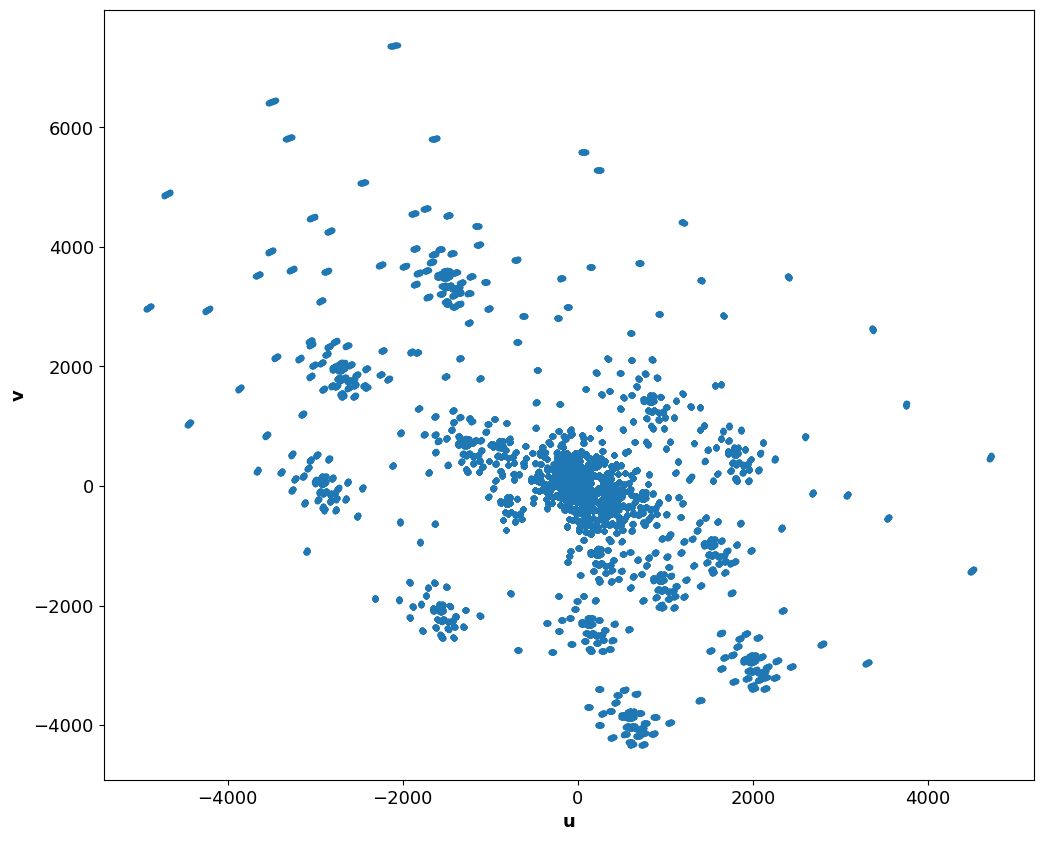

In [12]:
plt.plot(u,v,'.')
plt.xlabel('u')
plt.ylabel('v')

In [13]:

# Read the ANTENNA table
antenna_table = xds_from_table(data_path+"1548939342.ms::ANTENNA")

print(antenna_table)

[<xarray.Dataset> Size: 5kB
Dimensions:        (row: 50, xyz: 3)
Coordinates:
    ROWID          (row) int64 400B dask.array<chunksize=(50,), meta=np.ndarray>
Dimensions without coordinates: row, xyz
Data variables:
    DISH_DIAMETER  (row) float64 400B dask.array<chunksize=(50,), meta=np.ndarray>
    NAME           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    TYPE           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    MOUNT          (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    OFFSET         (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    POSITION       (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    FLAG_ROW       (row) bool 50B dask.array<chunksize=(50,), meta=np.ndarray>
    STATION        (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
Attributes:
    __daskms_partition_schema__:  ()]


In [14]:
antenna_table[0]

<xarray.Dataset> Size: 5kB
Dimensions:        (row: 50, xyz: 3)
Coordinates:
    ROWID          (row) int64 400B dask.array<chunksize=(50,), meta=np.ndarray>
Dimensions without coordinates: row, xyz
Data variables:
    DISH_DIAMETER  (row) float64 400B dask.array<chunksize=(50,), meta=np.ndarray>
    NAME           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    TYPE           (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    MOUNT          (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
    OFFSET         (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    POSITION       (row, xyz) float64 1kB dask.array<chunksize=(50, 3), meta=np.ndarray>
    FLAG_ROW       (row) bool 50B dask.array<chunksize=(50,), meta=np.ndarray>
    STATION        (row) object 400B dask.array<chunksize=(50,), meta=np.ndarray>
Attributes:
    __daskms_partition_schema__:  ()

In [15]:
antenna_table[0]['NAME'].values

array(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm009', 'm010',
       'm011', 'm013', 'm014', 'm015', 'm017', 'm019', 'm020', 'm021',
       'm022', 'm023', 'm024', 'm025', 'm027', 'm028', 'm029', 'm031',
       'm032', 'm033', 'm035', 'm037', 'm038', 'm039', 'm040', 'm041',
       'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049',
       'm050', 'm051', 'm055', 'm056', 'm057', 'm058', 'm059', 'm060',
       'm061', 'm062'], dtype=object)

In [16]:
antenna_table[0]['DISH_DIAMETER'].values

array([13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5])

In [17]:
antenna_table[0]['POSITION']

<xarray.DataArray 'POSITION' (row: 50, xyz: 3)> Size: 1kB
dask.array<read~POSITION~1548939342.ms/ANTENNA, shape=(50, 3), dtype=float64, chunksize=(50, 3), chunktype=numpy.ndarray>
Coordinates:
    ROWID    (row) int64 400B dask.array<chunksize=(50,), meta=np.ndarray>
Dimensions without coordinates: row, xyz

In [18]:
print(antenna_table[0]['POSITION'].values)

[[ 5109224.28330101  2006790.34830945 -3239100.60432023]
 [ 5109237.64002439  2006805.67700518 -3239069.99463992]
 [ 5109224.98529035  2006765.00133159 -3239115.19822119]
 [ 5109247.71453184  2006736.9651357  -3239096.13442916]
 [ 5109244.68809625  2006674.4233089  -3239139.81459295]
 [ 5109222.76106102  2006688.94849795 -3239165.94167899]
 [ 5109132.82118802  2006798.06539449 -3239242.19060095]
 [ 5109046.34250297  2006823.98222895 -3239363.79206003]
 [ 5109122.96650556  2006849.69137709 -3239225.88024209]
 [ 5109048.21915394  2006984.47473988 -3239261.95549118]
 [ 5109082.89642682  2007045.23603689 -3239169.09259079]
 [ 5109139.53273202  2006992.24816646 -3239111.37666584]
 [ 5109193.73983259  2007001.70002865 -3239019.08733502]
 [ 5109122.95791977  2006942.91666107 -3239168.36029351]
 [ 5109142.92017108  2006871.50044504 -3239180.65456621]
 [ 5109272.06096906  2006500.0158821  -3239203.48775662]
 [ 5109454.06397737  2006488.737612   -3238920.41294648]
 [ 5109368.62411322  2006509.64

In [19]:
X,Y,Z = antenna_table[0]['POSITION'][:,0],antenna_table[0]['POSITION'][:,1],antenna_table[0]['POSITION'][:,2]

In [20]:
import numpy as np
from itertools import combinations

# Extract antenna names and positions
antenna_names = antenna_table[0]['NAME'].values
X, Y, Z = antenna_table[0]['POSITION'][:,0], antenna_table[0]['POSITION'][:,1], antenna_table[0]['POSITION'][:,2]

# Create a list to store baselines and their corresponding antenna pairs
baselines = []

# Compute the Euclidean distance between each pair of antennas
for (i, j) in combinations(range(len(antenna_names)), 2):
    # Calculate the baseline distance between antennas i and j
    distance = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2 + (Z[i] - Z[j])**2)
    baselines.append((distance, antenna_names[i], antenna_names[j]))

# Find the shortest and longest baselines
shortest_baseline = min(baselines, key=lambda x: x[0])
longest_baseline = max(baselines, key=lambda x: x[0])

# Convert to NumPy array and extract as a float
shortest_distance = float(shortest_baseline[0].values)
longest_distance = float(longest_baseline[0].values)

# Output results with formatted distances
print(f"Shortest Baseline: {shortest_baseline[1]} to {shortest_baseline[2]} with distance {shortest_distance:.2f}")
print(f"Longest Baseline: {longest_baseline[1]} to {longest_baseline[2]} with distance {longest_distance:.2f}")




Shortest Baseline: m000 to m002 with distance 29.26
Longest Baseline: m048 to m060 with distance 7697.58


Short Baseline Visibility Data: [1.4278545  0.46046975 1.6678749  2.822858   3.4320507  3.638083
 3.3783703  2.770754   2.3274858  2.205064   2.447956   2.8646362
 3.1387546  3.0721197  2.9262395  2.5720015  2.231895   2.148641
 2.4801507  2.8241081  3.1117256  3.1682444  3.0931547  2.6981895
 2.2802196 ]
Long Baseline Visibility Data: [2.4216251 2.4484901 2.5071023 2.4882712 2.4636958 2.4320755 2.425972
 2.4436119 2.3937404 2.431837  2.4097142 2.3950772 2.4506376 2.4666557
 2.4453611 2.430379  2.432773  2.4753175 2.402229  2.4464386 2.4733524
 2.438687  2.4647875 2.4803581 2.446799 ]


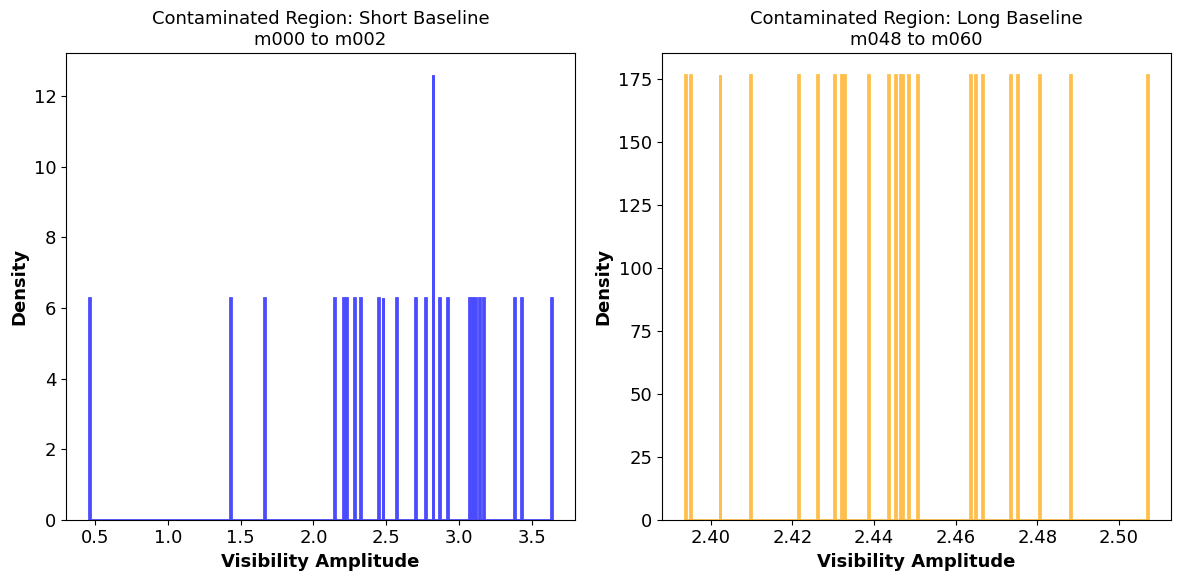

In [29]:
import matplotlib.pyplot as plt
def extract_visibility(a1_name, a2_name, idx_range):
    a1_idx = np.where(antenna_table[0]['NAME'].values == a1_name)[0][0]
    a2_idx = np.where(antenna_table[0]['NAME'].values == a2_name)[0][0]
    idx = np.where((ds[0].ANTENNA1 == a1_idx) & (ds[0].ANTENNA2 == a2_idx))[0]
    
    if idx.size == 0:
        print(f"No data found for antenna pair: {a1_name} - {a2_name}")
        return np.array([])  # Return an empty array if no data is found
    
    visibilities = np.abs(ds[0].DATA.data[idx][:, idx_range, 0].compute())
    if visibilities.size == 0:
        print(f"No visibility data for antenna pair: {a1_name} - {a2_name} in the selected index range.")
    
    return visibilities

# Extract visibility data
short_baseline_vis = extract_visibility(short_baseline_antennas[0], short_baseline_antennas[1], 400)
long_baseline_vis = extract_visibility(long_baseline_antennas[0], long_baseline_antennas[1], 400)

# Check the contents and shapes before concatenation
print("Short Baseline Visibility Data:", short_baseline_vis)
print("Long Baseline Visibility Data:", long_baseline_vis)



# Proceed with plotting if data is valid
if short_baseline_vis.size > 0 and long_baseline_vis.size > 0:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(short_baseline_vis, bins=500, alpha=0.7, color='blue', histtype = u'step', lw = 2, density=True)
    plt.title(f"Contaminated Region: Short Baseline\n{short_baseline_antennas[0]} to {short_baseline_antennas[1]}")
    plt.xlabel("Visibility Amplitude")
    plt.ylabel("Density")

    plt.subplot(1, 2, 2)
    plt.hist(long_baseline_vis, bins=500, alpha=0.7, color='orange', histtype = u'step', lw = 2, density=True)
    plt.title(f"Contaminated Region: Long Baseline\n{long_baseline_antennas[0]} to {long_baseline_antennas[1]}")
    plt.xlabel("Visibility Amplitude")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()
else:
    print("No valid visibility data available for plotting.")


        




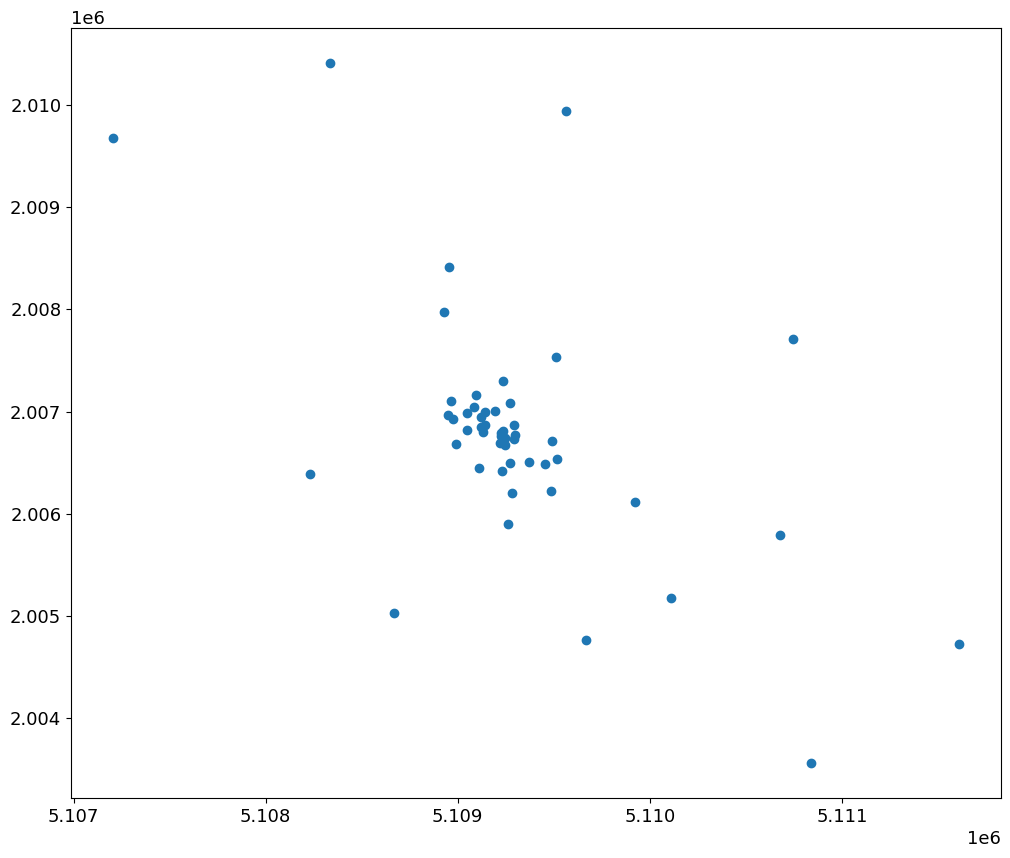

In [22]:
plt.plot(X,Y, 'o')

In [32]:

# Read the SPECTRAL table
spectral_table = xds_from_table(data_path+"1548939342.ms::SPECTRAL_WINDOW")

In [33]:
spectral_table[0]

<xarray.Dataset> Size: 33kB
Dimensions:          (row: 1, chan: 1024)
Coordinates:
    ROWID            (row) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: row, chan
Data variables: (12/14)
    EFFECTIVE_BW     (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    MEAS_FREQ_REF    (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    IF_CONV_CHAIN    (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    RESOLUTION       (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    NUM_CHAN         (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    CHAN_FREQ        (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    ...               ...
    CHAN_WIDTH       (row, chan) float64 8kB dask.array<chunksize=(1, 1024), meta=np.ndarray>
    REF_FREQUENCY    (row) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    NET_SIDEBAND     (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    FREQ_GROUP       (row) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    FREQ_GROUP_NAME  (row) object 8B dask.array<chunksize=(1,), meta=np.ndarray>
    FLAG_ROW         (row) bool 1B dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    __daskms_partition_schema__:  ()

In [34]:
frequencies = spectral_table[0]['CHAN_FREQ'].values
nchannels = spectral_table[0]['NUM_CHAN'].values[0]
channel_width = spectral_table[0]['CHAN_WIDTH'].values[0][0]


summary = {
    'Frequencies': frequencies,
    'No_Channeles': nchannels,
    'Channel_Width': channel_width,
    }

In [35]:
print(f"Frequency range (MHz): {summary['Frequencies'].min()/1.e6} - {summary['Frequencies'].max()/1.e6}")  
print(f"Total no of channles {summary['No_Channeles']}")
print(f"Channel width (kHz): {channel_width/1.e3}")

Frequency range (MHz): 856.0 - 1711.1640625
Total no of channles 1024
Channel width (kHz): 835.9375


# Working with Visibilities

In [36]:
# Let us now try to get the visibilities
vis = ds[0]['DATA']

In [37]:
vis.shape

(31875, 1024, 2)

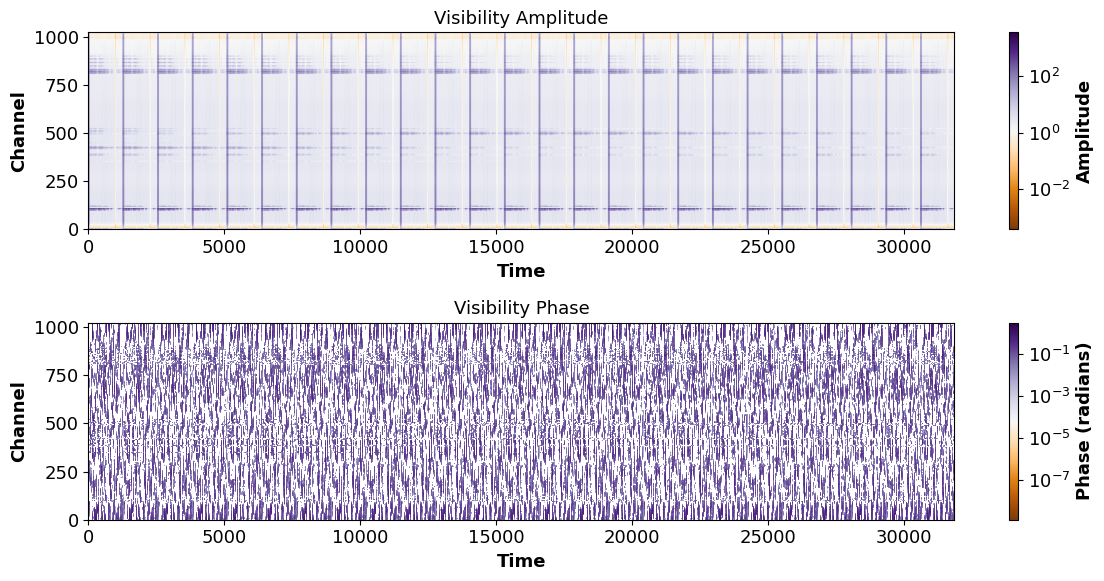

In [69]:
import numpy as np
import matplotlib.pyplot as plt



baseline_index = 0  


time_slice = vis[:, :, baseline_index]

# Compute amplitude and phase
amplitude = np.abs(time_slice)
phase = np.angle(time_slice)

# Plot amplitude and phase for each frequency over time
time_axis = np.arange(time_slice.shape[0])  
frequency_axis = np.arange(time_slice.shape[1])  

plt.figure(figsize=(12, 6))

# Amplitude plot
plt.subplot(2, 1, 1)
plt.imshow(amplitude.T, aspect='auto', origin='lower', extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]], cmap='PuOr', norm = colors.LogNorm())
plt.colorbar(label='Amplitude')
plt.xlabel('Time')
plt.ylabel('Channel')
plt.title('Visibility Amplitude')

# Phase plot
plt.subplot(2, 1, 2)
plt.imshow(phase.T, aspect='auto', origin='lower', extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]], cmap='PuOr', norm = colors.LogNorm())
plt.colorbar(label='Phase (radians)')
plt.xlabel('Time')
plt.ylabel('Channel')
plt.title('Visibility Phase')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.signal import detrend



amplitude = np.abs(time_slice)

# Detrend the amplitude over time for each frequency
detrended_amplitude = detrend(amplitude, axis=0, type = 'constant')  # Detrend along the time axis

# Plot the detrended amplitude
plt.figure(figsize=(10, 5))
#plt.plot(frequencies/1.e6,np.log10(detrended_amplitude),'-')
plt.imshow(detrended_amplitude.T, aspect='auto', origin='lower',extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]], cmap='PuOr', norm = colors.LogNorm())
plt.colorbar(label='Detrended Amplitude')
plt.xlabel('Time')
plt.ylabel('Channels')
plt.tight_layout()
#plt.savefig('Detrended Visibility')
plt.show()


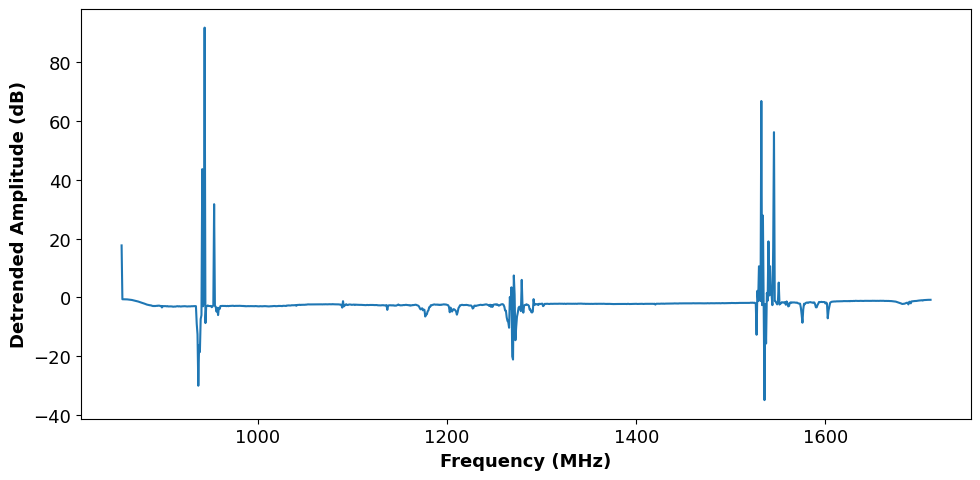

In [85]:
## Detrending the signal - Polynomial detrend
import numpy as np
import matplotlib.pyplot as plt



# Extract amplitude
amplitude = np.abs(time_slice)

# Define polynomial order 
poly_order = 6

# Time indices
time_axis = np.arange(amplitude.shape[0])

# Initialize an array to store the detrended amplitude
detrended_amplitude = np.zeros_like(amplitude)

# Apply polynomial detrending for each frequency channel
for freq_idx in range(amplitude.shape[1]):
    coeffs = np.polyfit(time_axis, amplitude[:, freq_idx], poly_order)
    trend = np.polyval(coeffs, time_axis)
    
    # Subtract the polynomial trend from the amplitude
    detrended_amplitude[:, freq_idx] = amplitude[:, freq_idx] - trend

# Plot the detrended amplitude
'''plt.figure(figsize=(10, 5))
plt.imshow(detrended_amplitude.T, aspect='auto', origin='lower',
           extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]],cmap='PuOr', norm = colors.LogNorm())
plt.colorbar(label='Detrended Amplitude')
plt.xlabel('Time')
plt.ylabel('Channel')
plt.tight_layout()
#plt.savefig(f'Polynomial Detrended Visibility Amplitude (Order {poly_order})')
plt.show()'''

time_idx = amplitude.shape[0] // 2  # Middle time point

# Plotting detrended amplitude for the selected time slice across all frequencies
plt.figure(figsize=(10, 5))
plt.plot(frequencies / 1.e6, detrended_amplitude[time_idx, :])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Detrended Amplitude (dB)')
plt.tight_layout()
plt.savefig(f'Polynomial Detrended Amplitude (Order {poly_order})')
plt.show()



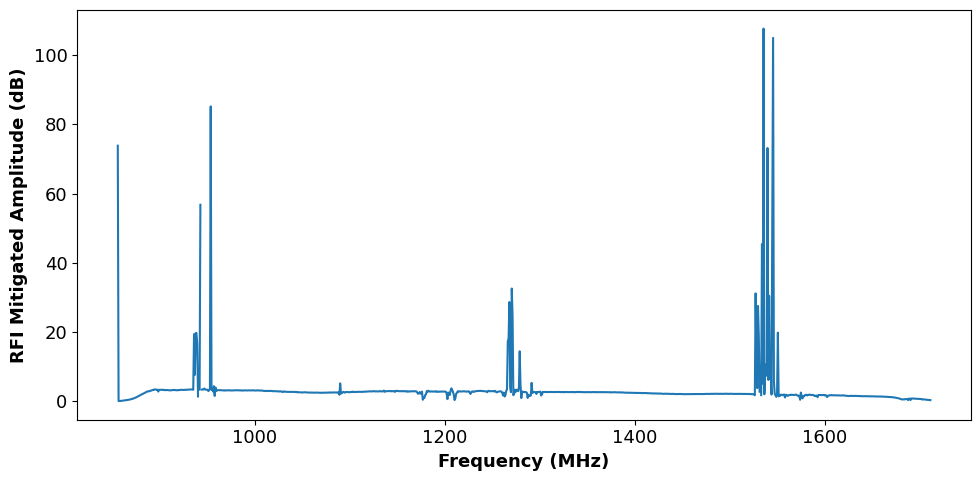

In [87]:
# filtering 

# Assuming `amplitude` contains the amplitude of the visibility data

# Define a threshold for RFI detection
rfi_threshold = np.mean(amplitude) + 3 * np.std(amplitude)  # Example: Mean + 3 standard deviations

# Identify RFI and replace it with NaN or flag it
amplitude_rfi_free = np.where(amplitude > rfi_threshold, np.nan, amplitude)
'''
# Plot the RFI-mitigated amplitude
plt.figure(figsize=(10, 5))
plt.imshow(amplitude_rfi_free.T, aspect='auto', origin='lower', extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]],cmap='PuOr', norm = colors.LogNorm())
plt.colorbar(label='RFI Mitigated Amplitude')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Visibility Amplitude with RFI Mitigation')
plt.tight_layout()
plt.show() '''

# Select a specific time slice (e.g., the middle time point)
time_idx = amplitude.shape[0] // 2  # Middle time point

# Plotting the RFI-mitigated amplitude for the selected time slice across all frequencies
plt.figure(figsize=(10, 5))
plt.plot(frequencies / 1.e6, amplitude_rfi_free[time_idx, :])
plt.xlabel('Frequency (MHz)')
plt.ylabel('RFI Mitigated Amplitude (dB)')
plt.tight_layout()
plt.savefig('RFI Mitigated Amplitude')
plt.show()


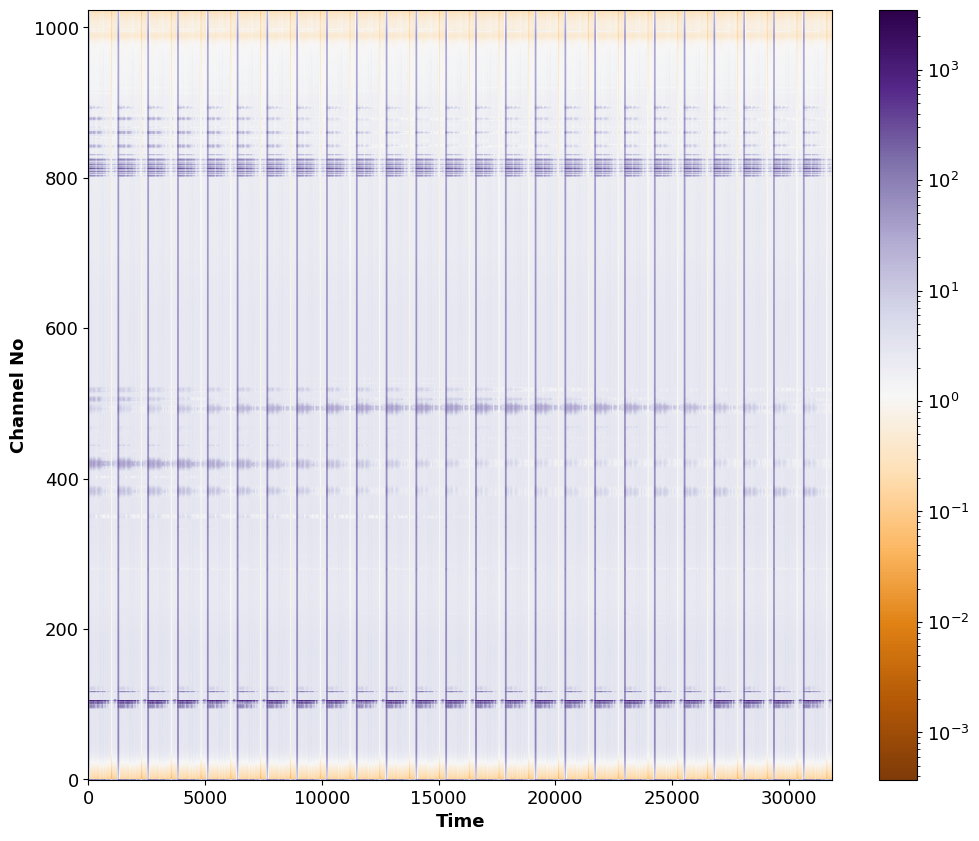

In [38]:
plt.imshow(np.abs(vis[:,:,0]).T, 
           aspect= 'auto', 
           origin='lower', 
           cmap='PuOr', 
           norm = colors.LogNorm()
           );
plt.ylabel('Channel No')
plt.xlabel('Time')
plt.colorbar();

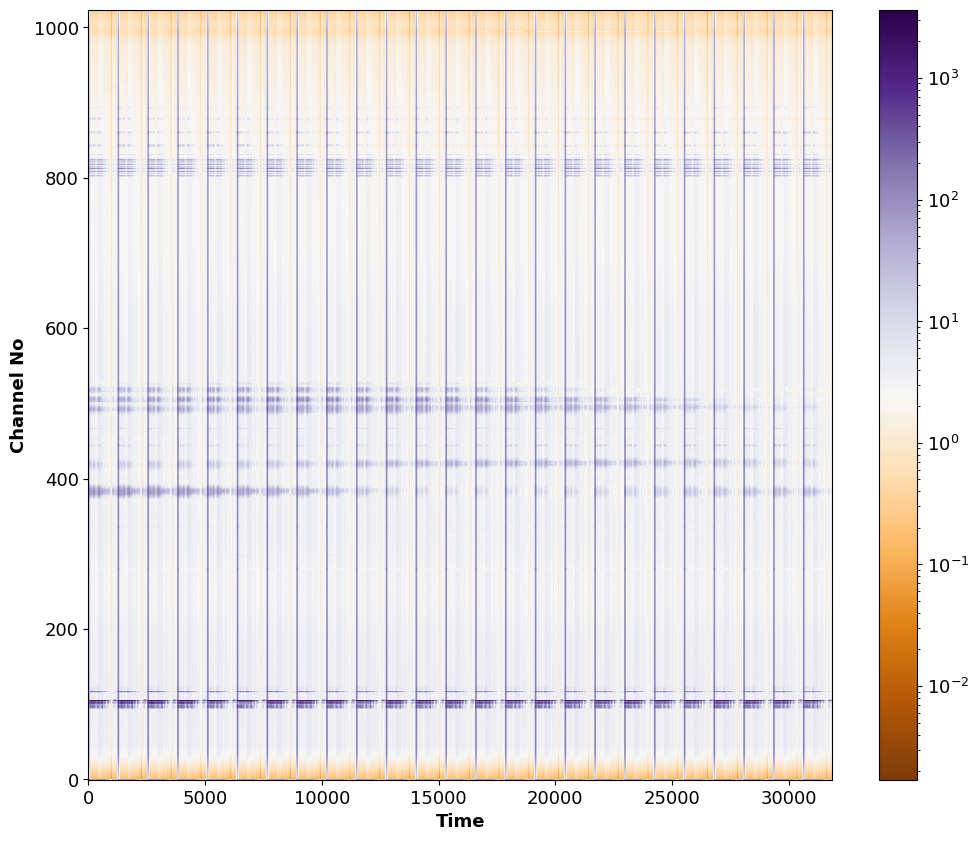

In [30]:
plt.imshow(np.abs(vis[:,:,1]).T, 
           aspect= 'auto', 
           origin='lower', 
           cmap='PuOr', 
           norm = colors.LogNorm()
           );
plt.ylabel('Channel No')
plt.xlabel('Time')
plt.colorbar();

In [40]:
phaset2selected = np.angle(vis[500,:,0].T)


Text(0.5, 0, 'Channel')

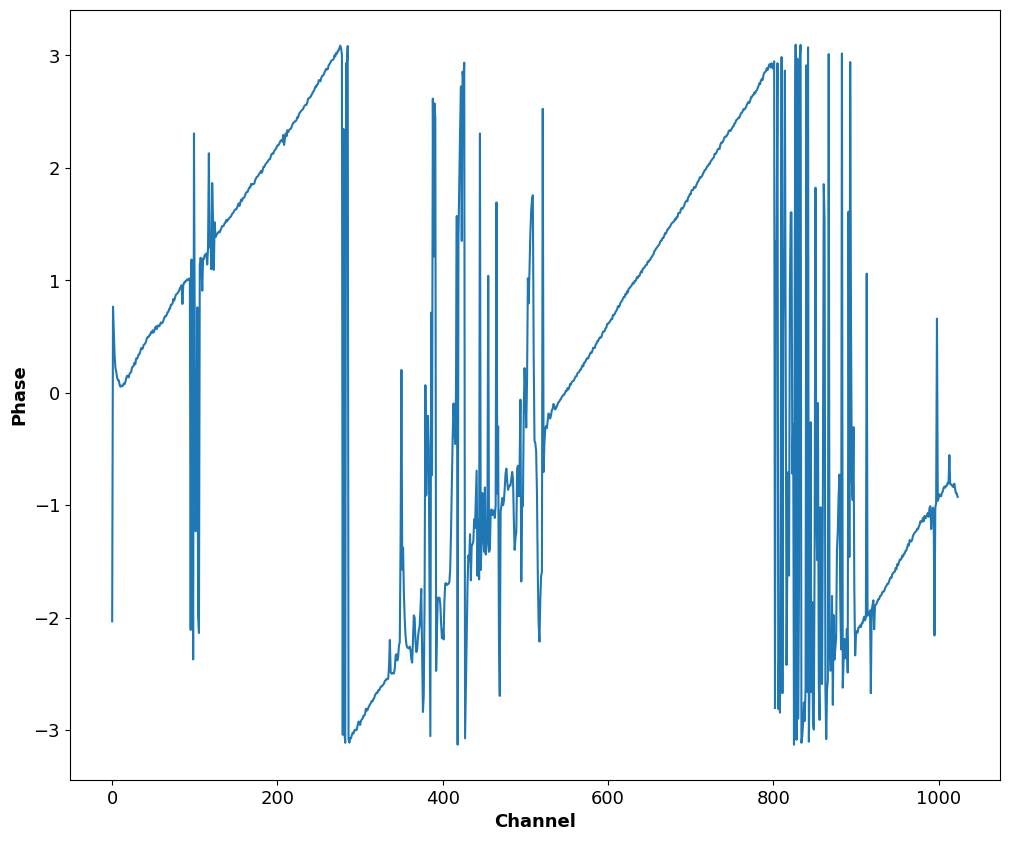

In [41]:
plt.plot(phaset2selected)
plt.ylabel('Phase')
plt.xlabel('Channel')



Text(0.5, 0, 'Channel')

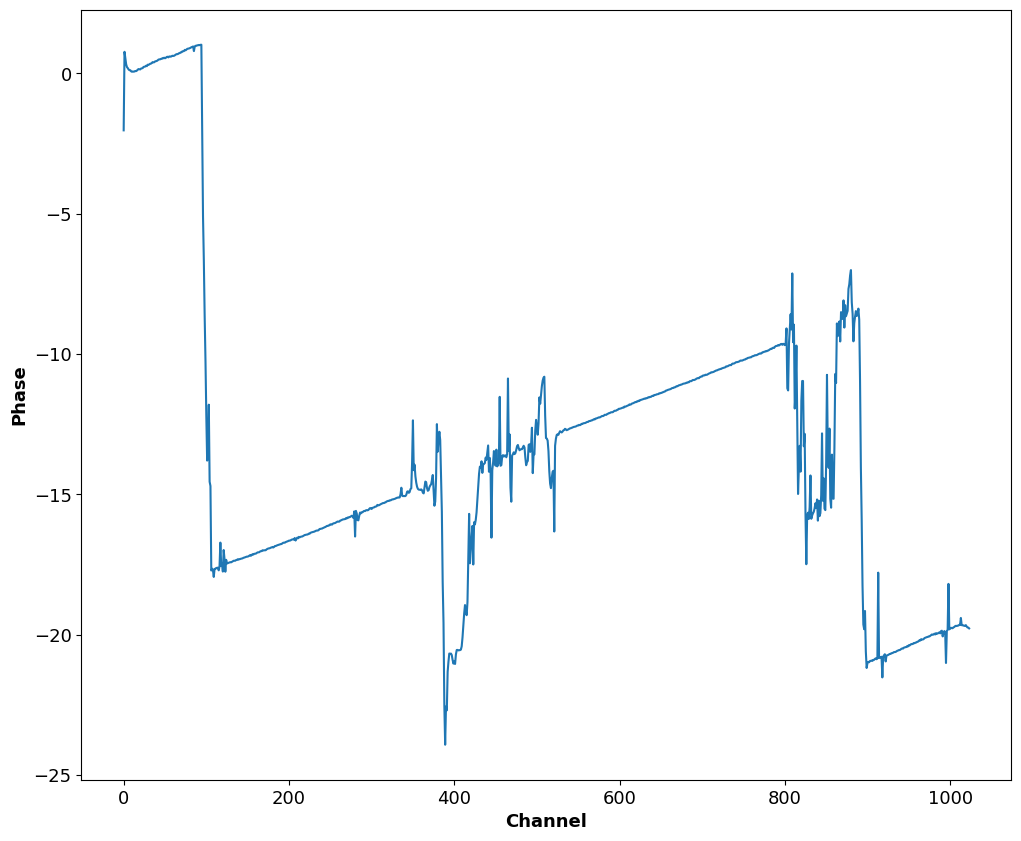

In [34]:
plt.plot(np.unwrap(phaset2selected))
plt.ylabel('Phase')
plt.xlabel('Channel')



In [42]:
def Gauss(x, dc, a, x0, sigma):
    '''
    This will fit a gaussian function to a data set
    '''
    return dc+a * np.exp(-(x - x0)**2 / (2 * sigma**2))


/tmp/ipykernel_3488/1300241273.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.set_xticks(np.arange(frequencies[0]/1.e6,frequencies[-1]/1.e6, step=100))


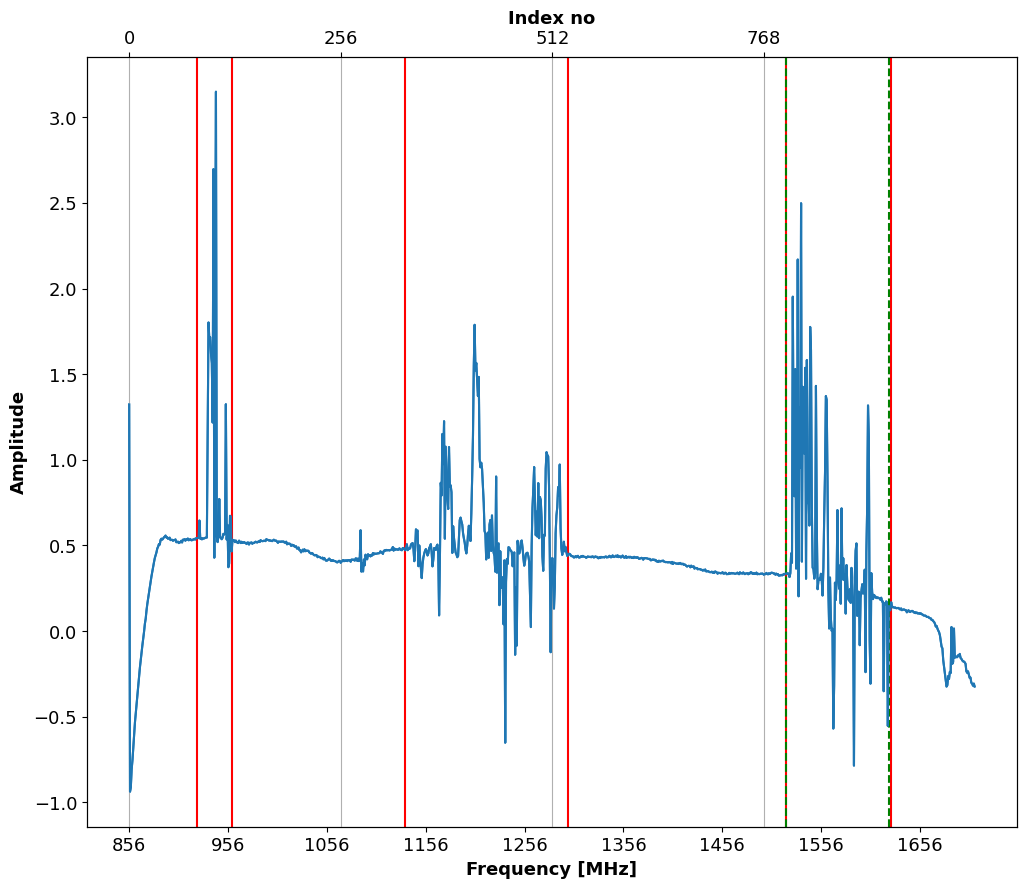

In [44]:
#
# Plot the average across frequency slice
#
frequencies = spectral_table[0]['CHAN_FREQ'].values.T
absdata = np.abs(vis[500,:,0]).compute()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(frequencies/1.e6,np.log10(absdata),'-')
ax1.set_xticks(np.arange(frequencies[0]/1.e6,frequencies[-1]/1.e6, step=100))
ax1.axvline(x = 960, color = 'r')
ax1.axvline(x = 925, color = 'r')
ax1.axvline(x = 1135, color = 'r')
ax1.axvline(x = 1300, color = 'r')
ax1.axvline(x = 1520, color = 'r')
ax1.axvline(x = 1627, color = 'r')
ax1.set_xlabel('Frequency [MHz]')
ax1.set_ylabel('Amplitude')

ax2.plot(np.log10(absdata))
ax2.set_xticks(np.arange(0,absdata.shape[0], step=256))
ax2.set_xlabel('Index no')
plt.grid()

# Assuming a calculated HPBW range, adjust the values as needed
# If the HPBW around 1.5 GHz spans from 1480 MHz to 1520 MHz, for example:
ax1.axvline(x=1520, color='g', linestyle='--')
ax1.axvline(x=1625, color='g', linestyle='--')

# Rest of the plotting code remains unchanged

plt.show()


In [57]:

channel_width = (frequencies[1] - frequencies[0]) / 1.e6  # Convert to MHz
hpbw_freq_span = 107
num_impacted_channels = np.round(hpbw_freq_span / channel_width)
print(channel_width)
print(num_impacted_channels)
ini_idx = np.argmin(np.abs(frequencies - 1520e6))  # 1520 MHz in Hz
fin_idx = np.argmin(np.abs(frequencies - 1627e6))  # 1627 MHz in Hz

print(f"Initial index for 1520 MHz: {ini_idx}")
print(f"Final index for 1627 MHz: {fin_idx}")


[0.8359375]
[128.]
Initial index for 1520 MHz: 794
Final index for 1627 MHz: 922


In [58]:
from scipy.optimize import curve_fit, minimize_scalar

/tmp/ipykernel_3488/2543499824.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_new = np.arange(frequencies[ini_idx], frequencies[fin_idx], 15)


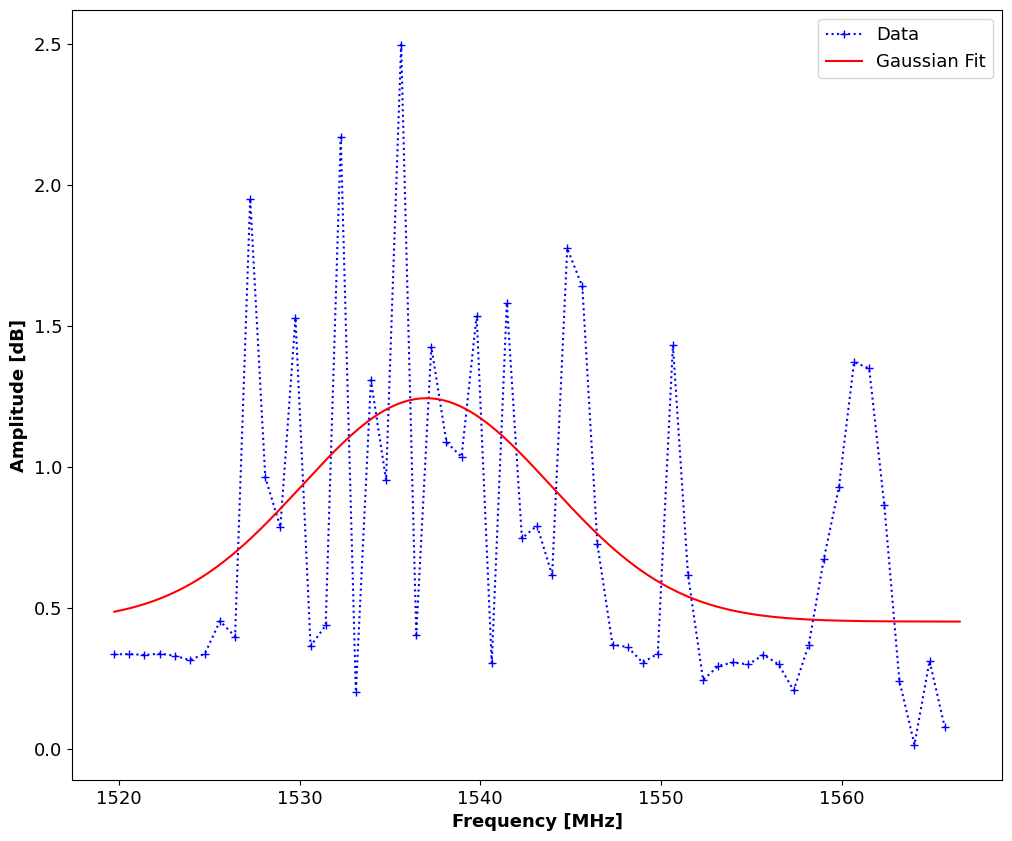

FWHM [MHz] = 16.296814481343194
Maximum amplitude is 1.2441266717428756 [dB]
Maximum is at 1537.01574 [MHz]
Number of channels affected: 19


/tmp/ipykernel_3488/2543499824.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  channels_affected = int((2. * np.sqrt(2. * np.log(2.)) * sigma) / channel_width)


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Ensure frequencies and absdata are numpy arrays
frequencies = np.array(frequencies)
absdata = np.array(absdata)

# Define Gaussian function
def Gauss(x, A, dc, mean, sigma):
    return A * np.exp(-(x - mean)**2 / (2 * sigma**2)) + dc

# Enter initial and final indices for the Gaussian fit
ini_idx = 794
fin_idx = 850

# Extract data and convert to numpy arrays if necessary
x = np.ravel(frequencies[ini_idx:fin_idx])
y = np.log10(absdata[ini_idx:fin_idx])

# Calculate initial guesses for Gaussian parameters
mean = np.sum(x * y) / np.sum(y)
sigma = np.sqrt(np.sum(y * (x - mean)**2) / np.sum(y))
dc = np.nanmean(np.log10(absdata[550:750])) - 1

# Perform Gaussian fit
popt, pcov = curve_fit(Gauss, x, y, p0=[max(y), dc, mean, sigma])

# Plot the data and the Gaussian fit
x_new = np.arange(frequencies[ini_idx], frequencies[fin_idx], 15)
plt.plot(x/1e6, y, 'b+:', label='Data')
plt.plot(x_new/1e6, Gauss(x_new, *popt), 'r-', label='Gaussian Fit')
plt.legend()

# Plot labels
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [MHz]')
plt.show()

# Calculate FWHM in MHz
sigma = popt[3]
fwhm_mhz = (2. * np.sqrt(2. * np.log(2.)) * sigma) / 1.e6
print(f"FWHM [MHz] = {fwhm_mhz}")

# Calculate maximum amplitude and its frequency
max_amp = max(Gauss(x_new, *popt))
max_freq = x_new[np.argmax(Gauss(x_new, *popt))] / 1.e6
print(f"Maximum amplitude is {max_amp} [dB]")
print(f"Maximum is at {max_freq} [MHz]")

# Calculate the number of channels affected
channel_width = frequencies[1] - frequencies[0]  # Calculate the channel width from data
channels_affected = int((2. * np.sqrt(2. * np.log(2.)) * sigma) / channel_width)
print(f"Number of channels affected: {channels_affected}")



In [64]:
# 350 - 400 good spike
# Use 50-150 for 1548939342.ms
ini_idx = int(input('Enter initial index for Gaussian fit '))
fin_idx = int(input('Enter final index for Gaussian fit '))

x = np.ravel(frequencies[ini_idx:fin_idx])
y = np.log10(absdata[ini_idx:fin_idx])

# weighted arithmetic mean (corrected - check the section below)
mean = (sum(x * y) / sum(y)).values
sigma = (np.sqrt(sum(y * (x - mean)**2) / sum(y))).values

dc = np.nanmean(np.log10(absdata[550:750]).values)-1

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), dc, mean, sigma])

plt.plot(x/1e6, y, 'b+:', label='data')
x_new = np.arange(frequencies[ini_idx], frequencies[fin_idx],15)
plt.plot(x_new/1e6, Gauss(x_new, *popt), 'r-', label='fit')
plt.legend()

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [MHz]')
plt.show()

print (f"FWHM [MHz] =  {(2.*np.sqrt(2.*np.log(2.))*sigma)/1.e6}")
print(f"Maximum amplitude is at [db], {max(Gauss(x_new, *popt))} ")
print (f"Maximum is at [MHz]  {x_new[np.argmax(Gauss(x_new, *popt))]/1.e6}")
print(f"Number of channels affected {int(((2.*np.sqrt(2.*np.log(2.))*sigma))/(channel_width))}")

Enter initial index for Gaussian fit  794
Enter final index for Gaussian fit  922


AttributeError: 'numpy.float64' object has no attribute 'values'

In [39]:

# Generate fake data
# rng = np.random.default_rng(0)
# x = np.linspace(-5., 5., 200)
# y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
# y += rng.normal(0., 0.2, x.shape)

# Fit the data using a box model.
# Bounds are not really needed but included here to demonstrate usage.


# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'k-+')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

NameError: name 'models' is not defined

In [48]:
vis_clean = []
vis_rfi = []
for a1 in range(0,10):
    for a2 in range(1,10):
        #print
        idx = np.where((ds[0].ANTENNA1 == a1) & (ds[0].ANTENNA2 == a2))[0]
        vis_rfi.append(np.abs(ds[0].DATA.data[idx][:,400,0].compute()))
        vis_clean.append(np.abs(ds[0].DATA.data[idx][:,600,0].compute()))
combined_array_clean = np.concatenate(vis_clean)
combined_array_rfi = np.concatenate(vis_rfi)

In [49]:
print(combined_array_clean.shape)

(1350,)


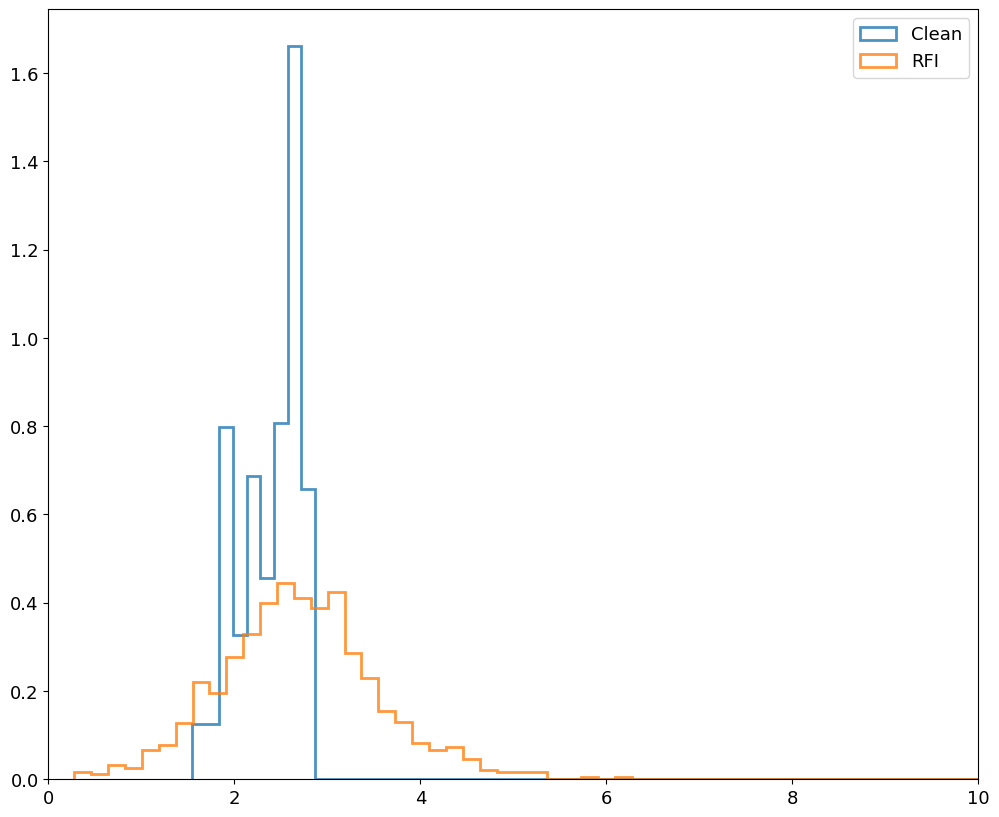

In [50]:
plt.hist(combined_array_clean,
        bins = 500,
        alpha = 0.8,
        histtype = u'step',
        lw = 2,
        density = True,label='Clean');
plt.hist(combined_array_rfi,
        bins = 500,
        alpha = 0.8,
        histtype = u'step',
        lw = 2,
        density = True, label='RFI');
plt.xlim(0,10)
plt.legend()
#plt.savefig('Histogram of RFI and Clean regions')

##### 

In [93]:

# Compute standard deviation for both regions
std_clean = np.std(combined_array_clean)
std_rfi = np.std(combined_array_rfi)
var_clean = np.var(combined_array_clean)
var_rfi = np.var(combined_array_rfi)
# Compute interquartile range for both regions

print(f"Clean Region - Standard Deviation: {std_clean}")
print(f"RFI Region - Standard Deviation: {std_rfi}")
print(f"Clean Region - Variance: {var_clean}")
print(f"RFI Region - Variance: {var_rfi}")

NameError: name 'combined_array_clean' is not defined

In [52]:
from scipy.stats import skew, kurtosis

# Calculate skewness
skew_clean = skew(combined_array_clean)
skew_rfi = skew(combined_array_rfi)

# Calculate kurtosis (Fisher’s definition, excess kurtosis)
kurtosis_clean = kurtosis(combined_array_clean)
kurtosis_rfi = kurtosis(combined_array_rfi)

print(f"Clean Region - Skewness: {skew_clean}, Kurtosis: {kurtosis_clean}")
print(f"RFI Region - Skewness: {skew_rfi}, Kurtosis: {kurtosis_rfi}")


Clean Region - Skewness: 1.9594288175110262, Kurtosis: 2.0228012287527912
RFI Region - Skewness: 1.9312447626225215, Kurtosis: 1.8836823267549772


In [ ]:
## Short and Long baselines visibilities
vis_short = []
vis_long = []

In [92]:
import matplotlib.pyplot as plt
from datetime import datetime

# Define a function to extract the required TLE parameters
def extract_tle_parameters(tle_lines):
    satellite_names = []
    inclinations = []
    epochs = []
    
    for i in range(0, len(tle_lines), 3):
        name = tle_lines[i].strip()
        line1 = tle_lines[i+1].strip()
        line2 = tle_lines[i+2].strip()
        
        # Extract the inclination and epoch time
        inclination = float(line2[8:16])
        year = int(line1[18:20])
        day_of_year = float(line1[20:32])
        
        # Convert TLE epoch format to datetime
        if year < 57:  # For years 2000 and above
            year += 2000
        else:  # For years before 2000
            year += 1900
            
        epoch = datetime(year, 1, 1) + timedelta(days=day_of_year - 1)
        
        satellite_names.append(name)
        inclinations.append(inclination)
        epochs.append(epoch)
    
    return satellite_names, epochs, inclinations

# Read TLE file
with open('/mnt/data/requested_TLE.txt', 'r') as file:
    tle_data = file.readlines()

# Extract parameters
satellite_names, epochs, inclinations = extract_tle_parameters(tle_data)

# Plot the inclination over time
plt.figure(figsize=(10, 6))
plt.scatter(epochs, inclinations, marker='o', color='blue')
plt.title('Satellite Inclination over Time')
plt.xlabel('Epoch Time')
plt.ylabel('Inclination (degrees)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/requested_TLE.txt'